# KNN Implementation

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=3, random_state=42)

In [3]:
n_features = X.shape[1]
m = X.shape[0]

In [4]:
print(X.shape, y.shape)

(2000, 2) (2000,)


In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([667, 667, 666], dtype=int64))

In [6]:
xt = np.array([[-10,5]]) # a test point

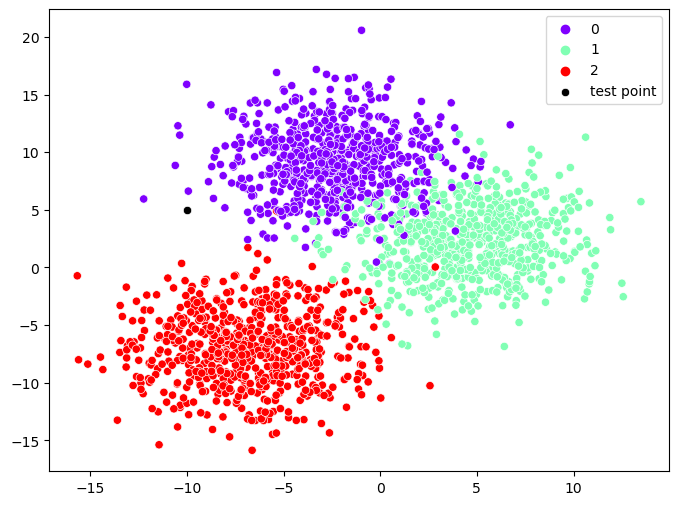

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = 'rainbow')
sns.scatterplot(x = xt[:,0], y = xt[:,1], color = 'black', label = 'test point')
plt.show()

In [25]:
def distance(a,b):
    
    return np.sqrt(np.sum((a-b)**2))
    
    
def KNN(X,y,xt, k= 4):
    
    xt = xt.flatten()
    m = X.shape[0]
    dist_list = []
    
    for i in range(m):
        d = distance(xt, X[i])
        dist_list.append((d, y[i]))
    
    dist_list = sorted(dist_list)   # sorting will happen based on the first tuple value, i.e. distance
    labels = np.array(dist_list)[:, 1]
    labels, count = np.unique(labels, return_counts=True)
    
    max_idx = count.argmax()
    pred = labels[max_idx]
    return int(pred)

In [27]:
pred_label = KNN(X,y,xt,k=5)
pred_label

0

## KNN Classifier from sklearn

In [ ]:
>>> neigh.fit(X, y)
KNeighborsClassifier(...)
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))
[[0.666... 0.333...]]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [34]:
X_train.shape, y_train.shape

((1500, 2), (1500,))

In [35]:
X_test.shape, y_test.shape

((500, 2), (500,))

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [38]:
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [39]:
y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)

In [40]:
y_pred_train[:6]

array([1, 0, 2, 0, 0, 1])

In [41]:
y_pred_test[:6]

array([0, 1, 2, 0, 2, 2])

In [42]:
classifier.score(X_train_scaled, y_train)

0.9666666666666667

In [43]:
classifier.score(X_test_scaled, y_test)

0.95